##Data Exploration Projekt

In [2]:
# Download and import of German Stopwords, execution only needed once
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [3]:
# All necessary imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from langdetect import detect
from ast import literal_eval
from fuzzywuzzy import fuzz

In [4]:
# Loading synonyms into a dataframe
kode = pd.read_excel("kode_data.xlsx", header=1)

# Keep one of the df commented
# Reading full dataset into dataframe
# df = pd.read_csv('jobs.csv', encoding='UTF-8')

# Reading sample dataset into dataframe
df = pd.read_excel("jobs_sample.xlsx")


In [ ]:
# Analyzing kode words for similarity
syn_list = []
syn_arr = np.zeros(shape=(308,308))

for i in range(64):
    for word in literal_eval(kode['syn'][i]):
        syn_list.append(word)

for word in syn_list:
    for comp in syn_list:
        ratio = []
        ratio.append(fuzz.ratio(word.lower(), comp.lower()))
        ratio.append(fuzz.partial_ratio(word.lower(), comp.lower()))
        ratio.append(fuzz.token_sort_ratio(word.lower(), comp.lower()))
        ratio.append(fuzz.token_set_ratio(word.lower(), comp.lower()))
        # syn_arr[syn_list.index(word)][syn_list.index(comp)] = ratio
        if 100 > ratio[2] > 85:
            print(word, comp, ratio)

# print(len(syn_list))
# print(syn_arr)
# print(syn_list[292], syn_list[293], syn_list[294])

In [ ]:
import pymongo

In [16]:
# Preparing all neccessary components
r64 = range(64)
arr = np.zeros(shape=(8,8))
stop_words = set(stopwords.words('german'))
synonyms = [(syn, i)    for i in r64 
                        for syn in literal_eval(kode['syn'][i])]
                        

# Function to count frequency of words in column and tokenize
def countall(col, lang:bool = False): # lang: True to check for language
    wcnt = Counter()
    for row in col:
        # if type(row) == str and detect(row) == 'de': # lang == True and 
        try:
            tokens = word_tokenize(row, language="german")
            words = [w.lower()  for w in tokens
                        if not w.lower() in stop_words]
            wcnt.update(words)
        except:
            pass
            # elif lang == False:
            #     tokens = word_tokenize(row)
            #     words = [w   for w in tokens
            #                     if not w.lower() in stop_words]
            #     wcnt.update(words)
            # except:
            #     pass 

    return wcnt

wcnt = countall(df['profile'], True)
# v = countall(df['title'])

# print(w.items()[0])

In [17]:
# import csv

# a_file = open("jobtitle_count3.csv", "w", encoding="utf8")

# writer = csv.writer(a_file)
# for key, value in w.most_common():
#     writer.writerow([key, value])

# a_file.close()

In [18]:

def synsyn(wcnt):
    dcnt = {i:0 for i in r64} # dict to count synonym value into
    for syn in synonyms:
        sylen = len(syn[0])
        for word in wcnt.keys(): 
            wlen = len(word)
            wlen_ul = wlen + 4
            wlen_ll = wlen - 3
            if wlen_ll <= sylen <= wlen_ul:
                ratio = fuzz.ratio(word.lower(), syn[0])
                if ratio > 80:
                    dcnt[syn[1]] += wcnt[word]
                    del wcnt[word]
                    break
            

    return dcnt

d = synsyn(wcnt)
        

In [19]:
for i in r64:
    x,y = literal_eval(kode['coord'][i])
    arr[x-1][y-1] = d[i]

print(arr)

[[4.12500e+03 2.87170e+04 3.50830e+04 3.53000e+02 2.44500e+04 6.15000e+02
  6.77000e+03 5.56840e+04]
 [2.14930e+04 1.23160e+04 1.27400e+04 8.12000e+04 5.93000e+02 3.06410e+04
  2.90000e+01 3.50120e+04]
 [1.18220e+04 1.93800e+03 5.30410e+04 0.00000e+00 5.28600e+03 3.18800e+03
  4.65000e+02 2.98100e+03]
 [3.11400e+03 4.80000e+01 9.02000e+02 8.81000e+02 3.10000e+01 9.90000e+01
  1.15400e+04 1.27300e+03]
 [2.31000e+02 3.00000e+00 7.90000e+01 4.11000e+02 3.66700e+03 3.48900e+03
  3.76000e+02 1.80570e+04]
 [3.66210e+04 1.95000e+04 1.91000e+03 5.08100e+03 5.87000e+02 1.18000e+02
  1.27527e+05 2.50000e+01]
 [3.73340e+04 3.16000e+02 3.86000e+02 6.50000e+01 1.72700e+04 1.80000e+01
  2.54442e+05 1.51600e+03]
 [1.11700e+03 9.00700e+03 1.00000e+00 7.85200e+03 3.90000e+01 1.53000e+02
  1.24000e+02 5.43700e+03]]


[[  8.  45.  83.  27.  60.   4.  24. 132.]
 [ 46.  20.  24. 205.   1.   5.   0.  83.]
 [ 34. 130.  33.   0.   9.  70.   5.  11.]
 [  2.   2.   4.   1.   0.   0.  30.   2.]
 [  0.   0.   1.   1.   7.   6.   1.  35.]
 [ 90.  43.   8.  18.   7.   0. 297.   0.]
 [ 83.   2.   2.   0.  48.   0. 595.   8.]
 [  5.   1.   1.  20.   1.   0.   1.  14.]]

In [49]:
ratio = fuzz.token_sort_ratio("Experten", "hallexperten")
hilfe = [7, 12, 18, 32]
print(ratio)

80


In [17]:
# start = time.time()
# d = countall()
# end = time.time()

# print(f"\nDuration: {np.round((end - start), 3)}s")


Duration: 41.09s


In [33]:
import multiprocessing as mp

print("Number of processors:", mp.cpu_count())

Number of processors: 8


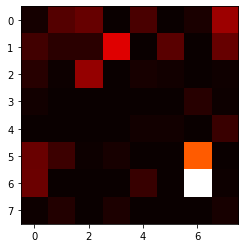

In [20]:
plt.imshow(arr, cmap='hot', interpolation='nearest')
plt.show()

<AxesSubplot:>

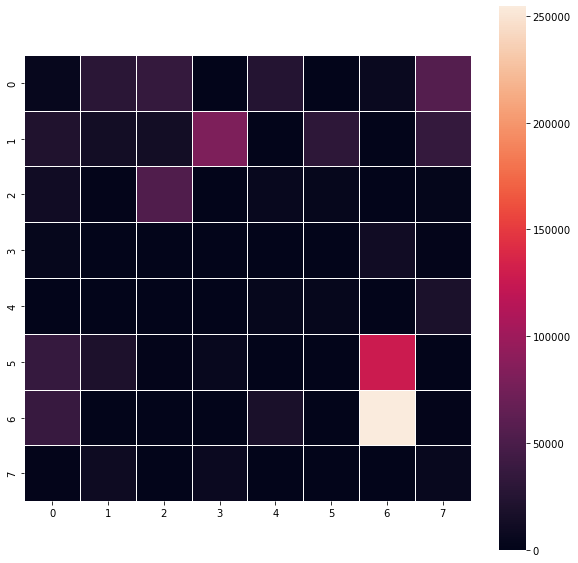

In [11]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(arr, linewidths=1, linecolor='w', square=True)

<AxesSubplot:xlabel='freq'>

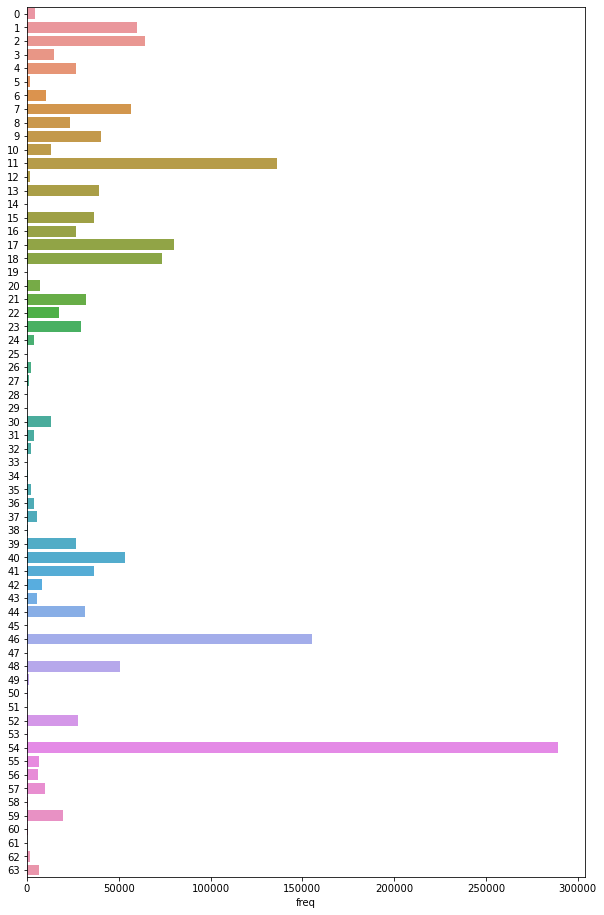

In [72]:
arrdf = pd.DataFrame(arr.flatten(), columns=['freq'])

plt.figure(figsize=(10,16))
sns.barplot(y=arrdf.index, x=arrdf.freq, orient='h')